In [1]:
import re
import numpy as np
import pandas as pd
import cpl_main as cpl

In [2]:
results = pd.read_csv(f'datasets/soccer-nn-train.csv')

In [3]:
results

,game,team,p1,p2,p3,p4,p5,p6,p7,p8,p9,p9.1,p10,p11,p12,p13,r,s
0,I1,Forge FC,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0,0,0,2,1
1,I1,York9 FC,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,0.47,0,0,0,2,1
2,I2,Pacific FC,0.54,0.78,0.69,0.50,0.39,0.72,0.69,0.57,0.51,0.79,0.27,0,0,0,3,1
3,I2,HFX Wanderers FC,0.54,0.92,0.77,0.67,0.62,0.57,0.52,0.47,0.37,0.77,0.28,0,0,0,1,0
4,I3,Pacific FC,0.54,0.78,0.69,0.50,0.39,0.72,0.69,0.57,0.51,0.79,0.27,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,XVIII389,Atlanta,0.73,0.82,0.74,0.70,0.53,0.94,0.85,0.62,0.40,0.84,0.03,0,0,0,1,1
1786,XVIII390,NY Red Bulls,0.72,0.74,0.63,0.60,0.58,0.79,0.70,0.69,0.61,0.06,0.03,0,0,0,3,1
1787,XVIII390,Orlando City,0.58,0.71,0.43,0.36,0.26,0.66,0.40,0.33,0.33,0.62,0.47,0,0,0,1,0
1788,XVIII391,NYCFC,0.77,0.66,0.56,0.46,0.42,0.97,0.60,0.54,0.49,0.67,0.33,0,0,0,3,3


In [4]:
results.shape

(1790, 18)

In [5]:
def pump_it_up(db):
    df = db.copy()
    dc = df.copy()
    m = df['p1'].copy()
    n = df['p2'].copy()
    o = df['p3'].copy()
    p = df['p4'].copy()
    q = df['p5'].copy()
    r = df['p6'].copy()
    df['p1'] = dc.pop('p8')
    df['p2'] = dc.pop('p10')
    df['p3'] = dc.pop('p12')
    df['p4'] = dc.pop('p9')
    df['p5'] = dc.pop('p11')
    df['p6'] = dc.pop('p13')
    df['p7'] = m
    df['p8'] = n
    df['p9'] = o
    df['p10'] = p
    df['p11'] = q
    df['p12'] = r
    df['p13'] = dc.pop('p7')
    dc = df.copy()
    db = pd.concat([db,df])
    df = dc.copy()
    m = df['p13'].copy()
    n = df['p12'].copy()
    o = df['p11'].copy()
    p = df['p10'].copy()
    q = df['p9'].copy()
    r = df['p8'].copy()
    df['p13'] = dc.pop('p8')
    df['p12'] = dc.pop('p10')
    df['p11'] = dc.pop('p12')
    df['p10'] = dc.pop('p9')
    df['p9'] = dc.pop('p11')
    df['p8'] = dc.pop('p13')
    df['p7'] = m
    df['p6'] = n
    df['p5'] = o
    df['p4'] = p
    df['p3'] = q
    df['p2'] = r
    df['p1'] = dc.pop('p7')
    #dc = df.copy()
    db = pd.concat([db,df])
    db = cpl.index_reset(db)
    return db

In [6]:
df = pump_it_up(results)
df.shape

(5370, 18)

In [7]:
db = pump_it_up(df)
db.shape

(16110, 18)

In [6]:
db = results.copy()

In [8]:
db.pop('game')
db.pop('team')
y = db.pop('s')
db.pop('r')
X = db

In [13]:
X['all'] = round(X.sum(axis = 1, skipna = True) / 13,2)

In [14]:
X.head(2)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p9.1,p10,p11,p12,p13,all
0,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0.0,0.0,0.0,0.59
1,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,0.47,0.0,0.0,0.0,0.64


In [15]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [16]:
#importing libraries from sklearn
from sklearn import tree
#from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler#,Imputer
from sklearn import metrics
#colours = sns.set_palette('pastel')

In [17]:
# import algorithm modules
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [18]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [21]:
seed = 7

In [22]:
#Linear Regression Model
def linearRegression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

lr = linearRegression()

print('Linear Regression Model')

print('\nRMSE: ', sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print('\nScore',round(lr.score(X_test, y_test)*100,2))

Linear Regression Model

RMSE:  1.2706527111336665

Score 1.29


In [23]:
#DecisionTreeRegressor
def decisionTree():
    model = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=8, max_features='log2')
    model.fit(X_train, y_train)
    return model

dt = decisionTree()

print('Decision Tree Regression Model')

print('\nRMSE: ', sqrt(mean_squared_error(y_test, dt.predict(X_test))))
print('\nScore',round(dt.score(X_test, y_test)*100,2))

Decision Tree Regression Model

RMSE:  1.2683436222214746

Score 1.65


In [24]:
#Random Forest Regression
def forestRegression():
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    model.fit(X_train, y_train)
    return model
    
rf = forestRegression()

print('Random Forest Regression Model')

print('\nRMSE: ', sqrt(mean_squared_error(y_test,rf.predict(X_test))))
print('\nScore',round(rf.score(X_test, y_test)*100,2))

Random Forest Regression Model

RMSE:  1.2733561723611195

Score 0.87


In [25]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf)])
vr = vr.fit(X_train, y_train)

In [26]:
print('Voting Regressor Model')

print('\nRMSE: ', sqrt(mean_squared_error(y_test,vr.predict(X_test))))
print('\nScore',round(vr.score(X_test, y_test)*100,2))

Voting Regressor Model

RMSE:  1.263311275380111

Score 2.43


In [27]:
def kerasSequential():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss = 'mse',
                optimizer = tf.keras.optimizers.RMSprop(0.1),
                metrics = ['mae', 'mse'])
    
    return model

In [28]:
ks = kerasSequential()
ks.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [29]:
trained_weight = ks.get_weights()[0]
trained_bias = ks.get_weights()[1]

In [30]:
EPOCHS = 450
history = ks.fit(X_train,
                 y_train,
                 epochs = EPOCHS,
                 batch_size = 128,
                 validation_split = 0.2,
                 verbose = 1)

Train on 9021 samples, validate on 2256 samples
Epoch 1/450
9021/9021 [==============================] - 2s 174us/sample - loss: 1329.5937 - mae: 5.3999 - mse: 1329.5936 - val_loss: 1.5562 - val_mae: 1.0193 - val_mse: 1.5562
Epoch 2/450
9021/9021 [==============================] - 0s 42us/sample - loss: 1.9748 - mae: 1.0994 - mse: 1.9748 - val_loss: 1.9628 - val_mae: 1.0556 - val_mse: 1.9628
Epoch 3/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.6291 - mae: 1.0267 - mse: 1.6291 - val_loss: 1.5061 - val_mae: 0.9974 - val_mse: 1.5061
Epoch 4/450
9021/9021 [==============================] - 0s 49us/sample - loss: 1.5802 - mae: 1.0242 - mse: 1.5802 - val_loss: 1.4931 - val_mae: 1.0069 - val_mse: 1.4931
Epoch 5/450
9021/9021 [==============================] - 0s 50us/sample - loss: 1.5800 - mae: 1.0252 - mse: 1.5800 - val_loss: 1.5105 - val_mae: 0.9962 - val_mse: 1.5105
Epoch 6/450
9021/9021 [==============================] - 0s 46us/sample - loss: 1.5779 - mae: 1

Epoch 49/450
9021/9021 [==============================] - 0s 53us/sample - loss: 1.5789 - mae: 1.0262 - mse: 1.5789 - val_loss: 1.4956 - val_mae: 1.0023 - val_mse: 1.4956
Epoch 50/450
9021/9021 [==============================] - 0s 49us/sample - loss: 1.5782 - mae: 1.0259 - mse: 1.5782 - val_loss: 1.5181 - val_mae: 1.0179 - val_mse: 1.5181
Epoch 51/450
9021/9021 [==============================] - 0s 44us/sample - loss: 1.5777 - mae: 1.0251 - mse: 1.5777 - val_loss: 1.4947 - val_mae: 1.0091 - val_mse: 1.4947
Epoch 52/450
9021/9021 [==============================] - 0s 48us/sample - loss: 1.5784 - mae: 1.0257 - mse: 1.5784 - val_loss: 1.4932 - val_mae: 1.0070 - val_mse: 1.4932
Epoch 53/450
9021/9021 [==============================] - 0s 40us/sample - loss: 1.5791 - mae: 1.0244 - mse: 1.5791 - val_loss: 1.4932 - val_mae: 1.0051 - val_mse: 1.4932
Epoch 54/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5788 - mae: 1.0261 - mse: 1.5788 - val_loss: 1.5262 - val_mae:

Epoch 97/450
9021/9021 [==============================] - 0s 43us/sample - loss: 1.5772 - mae: 1.0237 - mse: 1.5772 - val_loss: 1.5056 - val_mae: 1.0144 - val_mse: 1.5056
Epoch 98/450
9021/9021 [==============================] - 0s 44us/sample - loss: 1.5801 - mae: 1.0261 - mse: 1.5801 - val_loss: 1.4934 - val_mae: 1.0075 - val_mse: 1.4934
Epoch 99/450
9021/9021 [==============================] - 0s 44us/sample - loss: 1.5777 - mae: 1.0251 - mse: 1.5777 - val_loss: 1.4983 - val_mae: 1.0115 - val_mse: 1.4983
Epoch 100/450
9021/9021 [==============================] - 0s 47us/sample - loss: 1.5801 - mae: 1.0255 - mse: 1.5801 - val_loss: 1.5557 - val_mae: 1.0247 - val_mse: 1.5557
Epoch 101/450
9021/9021 [==============================] - 1s 56us/sample - loss: 1.5769 - mae: 1.0253 - mse: 1.5769 - val_loss: 1.5261 - val_mae: 0.9925 - val_mse: 1.5261
Epoch 102/450
9021/9021 [==============================] - 0s 40us/sample - loss: 1.5783 - mae: 1.0255 - mse: 1.5783 - val_loss: 1.4954 - val_m

Epoch 145/450
9021/9021 [==============================] - 0s 38us/sample - loss: 1.5801 - mae: 1.0262 - mse: 1.5801 - val_loss: 1.4949 - val_mae: 1.0028 - val_mse: 1.4949
Epoch 146/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5780 - mae: 1.0249 - mse: 1.5780 - val_loss: 1.5145 - val_mae: 0.9951 - val_mse: 1.5145
Epoch 147/450
9021/9021 [==============================] - 0s 39us/sample - loss: 1.5765 - mae: 1.0240 - mse: 1.5765 - val_loss: 1.4943 - val_mae: 1.0034 - val_mse: 1.4943
Epoch 148/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5795 - mae: 1.0258 - mse: 1.5795 - val_loss: 1.4940 - val_mae: 1.0038 - val_mse: 1.4940
Epoch 149/450
9021/9021 [==============================] - 0s 36us/sample - loss: 1.5779 - mae: 1.0250 - mse: 1.5779 - val_loss: 1.5149 - val_mae: 0.9951 - val_mse: 1.5149
Epoch 150/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5786 - mae: 1.0249 - mse: 1.5786 - val_loss: 1.4946 - va

9021/9021 [==============================] - 0s 42us/sample - loss: 1.5789 - mae: 1.0256 - mse: 1.5789 - val_loss: 1.5044 - val_mae: 1.0140 - val_mse: 1.5044
Epoch 193/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5789 - mae: 1.0261 - mse: 1.5789 - val_loss: 1.5266 - val_mae: 1.0197 - val_mse: 1.5266
Epoch 194/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5784 - mae: 1.0255 - mse: 1.5784 - val_loss: 1.4970 - val_mae: 1.0014 - val_mse: 1.4970
Epoch 195/450
9021/9021 [==============================] - 0s 40us/sample - loss: 1.5783 - mae: 1.0259 - mse: 1.5783 - val_loss: 1.5179 - val_mae: 0.9943 - val_mse: 1.5179
Epoch 196/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5778 - mae: 1.0261 - mse: 1.5778 - val_loss: 1.4986 - val_mae: 1.0005 - val_mse: 1.4986
Epoch 197/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5776 - mae: 1.0256 - mse: 1.5776 - val_loss: 1.4930 - val_mae: 1.0059 

Epoch 240/450
9021/9021 [==============================] - 0s 40us/sample - loss: 1.5799 - mae: 1.0251 - mse: 1.5799 - val_loss: 1.4999 - val_mae: 0.9999 - val_mse: 1.4999
Epoch 241/450
9021/9021 [==============================] - 0s 42us/sample - loss: 1.5806 - mae: 1.0261 - mse: 1.5806 - val_loss: 1.4943 - val_mae: 1.0034 - val_mse: 1.4943
Epoch 242/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5773 - mae: 1.0257 - mse: 1.5773 - val_loss: 1.4947 - val_mae: 1.0030 - val_mse: 1.4947
Epoch 243/450
9021/9021 [==============================] - 0s 40us/sample - loss: 1.5793 - mae: 1.0254 - mse: 1.5793 - val_loss: 1.4953 - val_mae: 1.0096 - val_mse: 1.4953
Epoch 244/450
9021/9021 [==============================] - 0s 36us/sample - loss: 1.5765 - mae: 1.0239 - mse: 1.5765 - val_loss: 1.4993 - val_mae: 1.0120 - val_mse: 1.4993
Epoch 245/450
9021/9021 [==============================] - 0s 36us/sample - loss: 1.5794 - mae: 1.0266 - mse: 1.5794 - val_loss: 1.5215 - va

9021/9021 [==============================] - 0s 44us/sample - loss: 1.5794 - mae: 1.0256 - mse: 1.5794 - val_loss: 1.4993 - val_mae: 1.0120 - val_mse: 1.4993
Epoch 288/450
9021/9021 [==============================] - 0s 38us/sample - loss: 1.5769 - mae: 1.0252 - mse: 1.5769 - val_loss: 1.5003 - val_mae: 1.0124 - val_mse: 1.5003
Epoch 289/450
9021/9021 [==============================] - 0s 44us/sample - loss: 1.5829 - mae: 1.0269 - mse: 1.5829 - val_loss: 1.4982 - val_mae: 1.0114 - val_mse: 1.4982
Epoch 290/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5780 - mae: 1.0265 - mse: 1.5780 - val_loss: 1.5580 - val_mae: 0.9871 - val_mse: 1.5580
Epoch 291/450
9021/9021 [==============================] - 0s 39us/sample - loss: 1.5774 - mae: 1.0244 - mse: 1.5774 - val_loss: 1.5427 - val_mae: 0.9895 - val_mse: 1.5427
Epoch 292/450
9021/9021 [==============================] - 0s 37us/sample - loss: 1.5785 - mae: 1.0253 - mse: 1.5785 - val_loss: 1.4930 - val_mae: 1.0061 

Epoch 335/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5803 - mae: 1.0258 - mse: 1.5803 - val_loss: 1.4960 - val_mae: 1.0101 - val_mse: 1.4960
Epoch 336/450
9021/9021 [==============================] - 0s 39us/sample - loss: 1.5778 - mae: 1.0261 - mse: 1.5778 - val_loss: 1.5124 - val_mae: 1.0164 - val_mse: 1.5124
Epoch 337/450
9021/9021 [==============================] - 0s 33us/sample - loss: 1.5780 - mae: 1.0263 - mse: 1.5780 - val_loss: 1.5204 - val_mae: 0.9938 - val_mse: 1.5204
Epoch 338/450
9021/9021 [==============================] - 0s 45us/sample - loss: 1.5783 - mae: 1.0250 - mse: 1.5783 - val_loss: 1.4979 - val_mae: 1.0113 - val_mse: 1.4979
Epoch 339/450
9021/9021 [==============================] - 0s 36us/sample - loss: 1.5804 - mae: 1.0262 - mse: 1.5804 - val_loss: 1.5024 - val_mae: 1.0133 - val_mse: 1.5024
Epoch 340/450
9021/9021 [==============================] - 0s 39us/sample - loss: 1.5768 - mae: 1.0256 - mse: 1.5768 - val_loss: 1.4992 - va

9021/9021 [==============================] - 0s 32us/sample - loss: 1.5784 - mae: 1.0264 - mse: 1.5784 - val_loss: 1.5603 - val_mae: 1.0254 - val_mse: 1.5603
Epoch 383/450
9021/9021 [==============================] - 0s 37us/sample - loss: 1.5801 - mae: 1.0274 - mse: 1.5801 - val_loss: 1.5397 - val_mae: 0.9900 - val_mse: 1.5397
Epoch 384/450
9021/9021 [==============================] - 0s 34us/sample - loss: 1.5809 - mae: 1.0258 - mse: 1.5809 - val_loss: 1.5207 - val_mae: 0.9937 - val_mse: 1.5207
Epoch 385/450
9021/9021 [==============================] - 0s 54us/sample - loss: 1.5777 - mae: 1.0256 - mse: 1.5777 - val_loss: 1.4932 - val_mae: 1.0072 - val_mse: 1.4932
Epoch 386/450
9021/9021 [==============================] - 0s 44us/sample - loss: 1.5779 - mae: 1.0269 - mse: 1.5779 - val_loss: 1.5012 - val_mae: 0.9993 - val_mse: 1.5012
Epoch 387/450
9021/9021 [==============================] - 0s 41us/sample - loss: 1.5807 - mae: 1.0259 - mse: 1.5807 - val_loss: 1.4994 - val_mae: 1.0001 

Epoch 430/450
9021/9021 [==============================] - 0s 33us/sample - loss: 1.5764 - mae: 1.0258 - mse: 1.5764 - val_loss: 1.5186 - val_mae: 0.9942 - val_mse: 1.5186
Epoch 431/450
9021/9021 [==============================] - 0s 31us/sample - loss: 1.5804 - mae: 1.0263 - mse: 1.5804 - val_loss: 1.4997 - val_mae: 1.0000 - val_mse: 1.4997
Epoch 432/450
9021/9021 [==============================] - 0s 43us/sample - loss: 1.5785 - mae: 1.0246 - mse: 1.5785 - val_loss: 1.4992 - val_mae: 1.0119 - val_mse: 1.4992
Epoch 433/450
9021/9021 [==============================] - 0s 42us/sample - loss: 1.5768 - mae: 1.0253 - mse: 1.5768 - val_loss: 1.5163 - val_mae: 0.9947 - val_mse: 1.5163
Epoch 434/450
9021/9021 [==============================] - 0s 38us/sample - loss: 1.5796 - mae: 1.0267 - mse: 1.5796 - val_loss: 1.5219 - val_mae: 1.0187 - val_mse: 1.5219
Epoch 435/450
9021/9021 [==============================] - 0s 35us/sample - loss: 1.5778 - mae: 1.0249 - mse: 1.5778 - val_loss: 1.4948 - va

In [35]:
hist = pd.DataFrame(history.history)
mse = hist['mse']
epochs = history.epoch

In [36]:
from matplotlib import pyplot as plt
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    plt.plot(feature.tolist(), label.tolist(), c='r')
    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, mse):
    """Plot the loss curve, which shows loss vs. epoch."""
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.plot(epochs, mse, label="Loss")
    plt.legend()
    plt.ylim([mse.min()*0.97, mse.max()])
    plt.show()

In [43]:
feature = X['all'].copy()
label = y.copy()

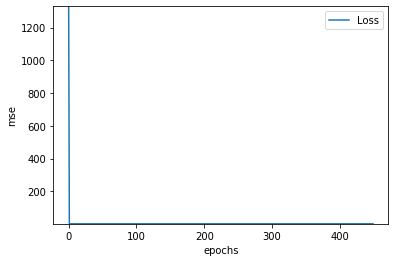

In [44]:
#plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, mse)

In [53]:
hist.describe()

,loss,mae,mse,val_loss,val_mae,val_mse
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,2.803843,1.031873,2.803842,1.504275,1.005114,1.504275
std,25.982278,0.130777,25.982274,0.014562,0.007881,0.014562
min,1.574093,1.022573,1.574093,1.487447,0.985365,1.487447
25%,1.577757,1.025135,1.577757,1.494450,0.999757,1.494450
50%,1.578756,1.025715,1.578756,1.498291,1.004923,1.498290
75%,1.579734,1.026289,1.579734,1.508579,1.010344,1.508579
max,552.746356,3.799840,552.746277,1.588293,1.029055,1.588293


In [54]:
def check(a,b):
    #print('pred :',a,'actual :',b)
    if a == b:
        result = 1
    else:
        result = 0
    return result

In [57]:
print('lr',lr.score(X_train, y_train))
print('dt',dt.score(X_train, y_train))
print('rf',rf.score(X_train, y_train))
print('vr',vr.score(X_train, y_train))
ks_test = ks.evaluate(X_train, y_train,verbose=0)
print('ks',ks_test[1])

lr 0.01645190829802634
dt 0.027579228500445585
rf 0.06393244945485976
vr 0.044768542160292024
ks 1.0110543


In [39]:
from matplotlib import pyplot as plt

In [58]:
def print_pred_results(result,num):
    score = check(result,y_test.loc[num])
    return score

def predictionTest(num,model):
    p = X_test.loc[num].tolist()
    result = model.predict([p]).flatten().round()
    prediction = print_pred_results(int(result[0]),num)
    return prediction

In [59]:
import random
numbers = X_test.index
random_nums = random.choices(numbers, k=20)

In [60]:
a,b,c,d = [],[],[],[]
for i in random_nums:
    a.append(predictionTest(i,vr))
    b.append(predictionTest(i,dt))
    c.append(predictionTest(i,rf))
    d.append(predictionTest(i,ks))
print('vr score: ',sum(a) / 20,'\ndt score: ',sum(b) / 20,'\nrf score: ',sum(c) / 20,'\nks score: ',sum(d) / 20)

vr score:  0.55 
dt score:  0.5 
rf score:  0.5 
ks score:  0.4


In [50]:
def cycle_prob_test(num,model):
    p = X_test.iloc[num].tolist()
    e = model.predict([p]).flatten()
    e = e[0]
    if e < 1:
        e = 0
    elif e < 2:
        e = 1
    return e

def model_pred_test(model):
    b = []
    prob = []
    random_nums = np.random.randint(low=1, high=58, size=(20))
    for i in random_nums:
        prob.append(cycle_prob_test(i,model))
    df = pd.DataFrame(prob)
    df = df.values
    print('scores :\n',df)

In [51]:
import pickle
filename = 'models/cpl_score_regressor.sav'
pickle.dump(dt, open(filename, 'wb'))

In [52]:
import pandas as pd
import pickle
import cpl_main as cpl

In [53]:
year = '2020'
team_ref = pd.read_csv('datasets/teams.csv')
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')
results_brief = pd.read_csv(f'datasets/{year}/cpl-{year}-results_brief.csv')
team_stats = pd.read_csv(f'datasets/{year}/cpl-{year}-team_stats.csv')
schedule = pd.read_csv(f'datasets/{year}/cpl-{year}-schedule.csv')
rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [54]:
filename = 'models/cpl_score_regressor.sav'
cpl_score_model = pickle.load(open(filename, 'rb'))

In [55]:
#model_pred_test(cpl_classifier_model)

In [168]:
# home side
q1 = schedule.iloc[0]['home']
# away side
q2 = schedule.iloc[0]['away']
print(q1,q2)

Forge FC Cavalry FC


In [169]:
compare = cpl.get_team_comparison(results_brief,q1,q2)

In [170]:
t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

In [171]:
game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

,game,home,away
0,II1,Forge FC,Cavalry FC


In [172]:
game = game_info.iloc[0]['game']
game_h = cpl.get_home_away_comparison(stats,game,q1)
game_a = cpl.get_home_away_comparison(stats,game,q2)

In [173]:
home_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
away_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)

/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [174]:
def get_overall_roster(game_roster):
    b = []
    for i in range(game_roster.shape[0]):
        b.append(game_roster.iloc[i]['overall']) # get the player overall score for each player in the game
    if len(b) < 16:
        i = int(16 - len(b))
        for j in range(0,i):
            b.append(0)
    db = pd.DataFrame(b[0:14])
    db = db.T
    return db

In [175]:
q1_roster = get_overall_roster(home_roster)
q1_roster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.71,0.89,0.74,0.71,0.33,0.77,0.52,0.5,0.48,0.33,0.21,0,0,0


In [176]:
q2_roster = get_overall_roster(away_roster)
q2_roster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.79,0.91,0.75,0.33,0.0,0.66,0.66,0.62,0.37,0.73,0.43,0,0,0


In [177]:
def roster_regressor_pred(model,array):
    prediction = model.predict([array]).flatten()
    df = pd.DataFrame(prediction)
    return df

In [178]:
home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)

In [179]:
home_win

0.33

In [180]:
away_win

0.33

In [181]:
classifier = 'models/cpl_roster_classifier.sav'
cpl_classifier_model = pickle.load(open(classifier, 'rb'))

In [182]:
home_win_new, away_win_new, draw_new = cpl.get_final_game_prediction(cpl_classifier_model,q1_roster,q2_roster,home_win,away_win,draw)

In [183]:
home_win_new

0.35

In [184]:
away_win_new

0.35

In [185]:
print(q1,'\nwin probability: ', round(home_win_new,2))

Forge FC 
win probability:  0.35


In [186]:
print(q2,'\nwin probability: ', round(away_win_new,2))

Cavalry FC 
win probability:  0.35


In [187]:
print('Draw probability: ', round(draw_new,2))

Draw probability:  0.3


In [191]:
def get_final_score_prediction(model,q1_roster,q2_roster,home_win_new,away_win_new):
    
    def final_score_fix(home_score,away_score,home_win_new,away_win_new):
        if home_win_new > away_win_new: # fix the score prediction - if the probability of home win > away win
            home_score = away_score + 1 # change the predicted score to reflect that
            return home_score,away_score 
        elif home_win_new < away_win_new: # else the probability of home win < away win
            away_score = home_score + 1 # change the predicted score to reflect that
            return home_score,away_score
        else:
            return home_score,away_score
    
    def score(num): #improve this later for greater predictions
        new_score = int(round(num,0)) # convert the float value to int and round it
        return new_score
    
    q1_pred = roster_pred(model,q1_roster)
    q1_s = score(q1_pred.iloc[0][0])
    q2_pred = roster_pred(model,q2_roster)
    q2_s = score(q2_pred.iloc[0][0])
    home_score, away_score = final_score_fix(q1_s, q2_s,home_win_new,away_win_new)
    return home_score, away_score

In [192]:
def roster_pred(model,array):
    prediction = model.predict([array]).flatten()
    df = pd.DataFrame(prediction)
    #print('score :',prediction)
    return df

In [193]:
home_score, away_score = get_final_score_prediction(cpl_score_model,q1_roster,q2_roster,home_win_new,away_win_new)

In [194]:
print(home_score, away_score)

2 2


def final_score_fix(home_score,away_score,home_win_new,away_win_new):
    if home_win_new > away_win_new:
        print('greater')
        home_score = away_score + 1
        return home_score,away_score 
    elif home_win_new < away_win_new:
        print('less than')
        away_score = home_score + 1
        return home_score,away_score    

In [197]:
home_score

2

In [198]:
away_score

2